# Programación para *Data Science*

Unidad 7: Análisis de datos en Python
------------------------------------------------------

## Instrucciones de uso

A continuación se presentarán explicaciones y ejemplos de análisis de datos en Python. Recordad que podéis ir ejecutando los ejemplos para obtener sus resultados.

## Introducción

En este módulo trabajaremos con librerías que ya hemos presentado en los módulos anteriores ([NumPy](http://www.numpy.org/), [pandas](http://pandas.pydata.org/) y [scikit-learn](http://scikit-learn.org)).

Este Notebook contiene ejemplos concretos de técnicas que pueden aplicarse para analizar los datos. Como en el módulo anterior, es importante destacar que se han seleccionado únicamente algunas técnicas pero, en la práctica, el conjunto de técnicas que se aplican para el análisis de datos es mucho más amplio. Además, para la mayoría de ejemplos usaremos las configuraciones por defecto incorporadas en las librerías, pero algunas de las funciones que probaremos tienen multitud de parámetros que podemos ajustar.

## Primeros pasos

Para empezar, cargamos el conjunto de datos de flores de iris:

In [2]:
from sklearn import datasets

# Cargamos el dataset de iris:
iris = datasets.load_iris()

## Análisis exploratorio de datos

En primer lugar, observaremos las características principales de los datos que utilizaremos en este Notebook. Conocer los datos con los que trabajaremos nos ayudará después en la creación de modelos y la validación de hipótesis.

Podemos echar un vistazo a la descripción del *dataset*:

In [3]:
print iris.DESCR

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

En el conjunto Iris que acabamos de cargar, los datos están organizados de la siguiente forma: cada fila es una muestra y por cada muestra, las columnas (las características) son: longitud del sépalo, ancho del sépalo, longitud del pétalo y ancho del pétalo.

Representar visualmente los datos también nos permite realizar una primera aproximación a los mismos. Vamos a generar un _scatter plot_ con los dos primeros atributos.

Text(0,0.5,u'Ancho S\xe9palo')

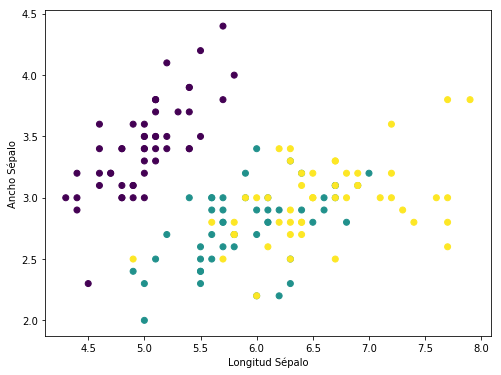

In [5]:
%matplotlib inline

# Importamos las librerías.
import matplotlib.pyplot as plt
from sklearn import datasets

# Importamos el dataset.
iris = datasets.load_iris()

# Seleccionamos solo los dos primeros atributos.
X = iris.data[:, :2]
Y = iris.target

# Creamos la figura.
plt.figure(1, figsize=(8, 6))
plt.clf()

# Coloreamos utilizando la categoría.
plt.scatter(X[:, 0], X[:, 1], c=Y)
plt.xlabel(u'Longitud Sépalo')
plt.ylabel(u'Ancho Sépalo')


Después, creamos un _box plot_ que resume los datos de todos los atributos disponibles.

In [4]:
# Cargamos los datos en un dataframe de pandas.
import pandas as pd
df = pd.DataFrame(iris.data, columns=iris.feature_names)

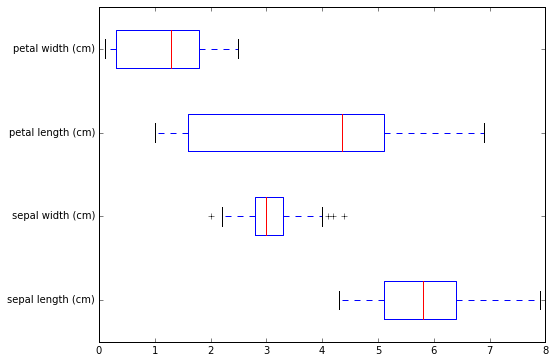

In [5]:
# Mostramos un box plot con los 4 atributos.
df.plot.box(vert=False, figsize=(8, 6))

Finalmente, mostramos histogramas para los valores de cada atributo.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa6accc6450>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7fa6a9330d90>]], dtype=object)

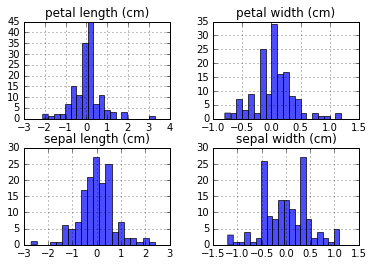

In [6]:
# Generamos los histogramas.
df.diff().hist(alpha=0.7, bins=20)

## Clasificación

Existen múltiples algoritmos de clasificación. Veamos un ejemplo de cómo usar un clasificador _k nearest neighbors_ para predecir el tipo de especies de iris.

In [10]:
# Importamos el clasificador KNeighborsClassifier de la librería sklearn.
from sklearn.neighbors import KNeighborsClassifier
# Importamos NumPy.
import numpy as np

# Seleccionamos las dos primeras características (usaremos únicamente dos características para
# poder representar gráficamente los resultados en 2D).
X = iris.data[:, :2]
y = iris.target

# Separamos los datos (de manera aleatoria) en dos subconjuntos: el de aprendizaje y el de test.
indices = np.random.permutation(len(iris.data))
iris_X_train = X[indices[:-10]]
iris_y_train = y[indices[:-10]]
iris_X_test  = X[indices[-10:]]
iris_y_test  = y[indices[-10:]]

# Creamos el clasificador.
knn = KNeighborsClassifier()

# Entrenamos el clasificador.
knn.fit(iris_X_train, iris_y_train) 

# Probamos el clasificador.
iris_y_test_predicted = knn.predict(iris_X_test)

# Mostramos los resultados de la predicción sobre el conjunto de test.
print "Clases reales: \t\t" + str(iris_y_test)
print "Clases predichas: \t" + str(iris_y_test_predicted)
print "Accuracy: \t\t" + str(knn.score(iris_X_test, iris_y_test))

Clases reales: 		[2 2 2 2 0 2 1 0 1 1]
Clases predichas: 	[1 2 1 2 0 2 1 0 2 2]
Accuracy: 		0.6


Podemos visualizar gráficamente el clasificador aprendido:

1.0
[1 1 1 ... 2 2 2]
[[1 1 1 ... 2 2 2]
 [1 1 1 ... 2 2 2]
 [1 1 1 ... 2 2 2]
 ...
 [0 0 0 ... 2 2 2]
 [0 0 0 ... 2 2 2]
 [0 0 0 ... 2 2 2]]


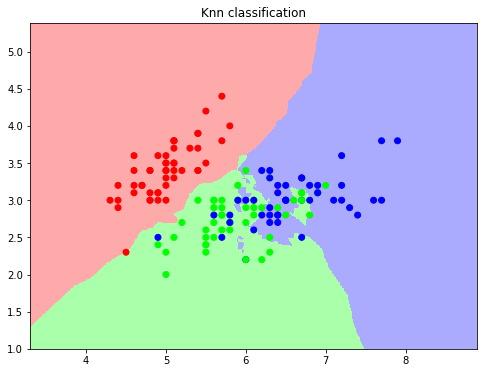

In [15]:
%matplotlib inline
import pandas as pd
import numpy as np
# Importamos la librería.
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# Creamos los mapas de colores que usaremos para la representación.
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

# Calculamos los límites de la visualización.
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
print y_min

# Realizamos la predicción.
h = .01
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])

print Z
# Mostramos el resultado en una figura.
plt.figure(1, figsize=(8, 6))
Z = Z.reshape(xx.shape)
print Z
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

# Mostramos las muestras utilizadas en el aprendizaje.
plt.scatter(iris_X_train[:, 0], iris_X_train[:, 1], c=iris_y_train, cmap=cmap_bold)

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("Knn classification")

plt.show()

## Clústering

Como con los algoritmos de clasificación, actualmente existen multitud de algoritmos de clústering. Veámos un ejemplo de utilización del algoritmo *k-means*.

En primer lugar, generamos una visualización del conjunto de muestras. A continuación tenéis un código de ejemplo en el que representamos la taxonomía de las diferentes muestras (coloreamos por clase de Iris) dependiendo de la longitud del sépalo (columna 0), ancho del sépalo (columna 1) y longitud del pétalo (columna 2):

[]

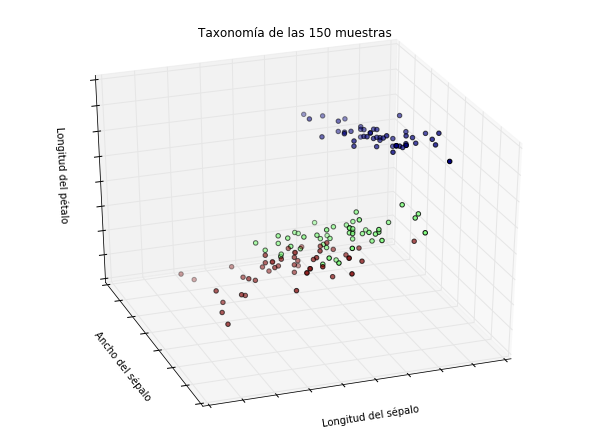

In [9]:
%matplotlib inline

# Cargamos las librerías necesarias.
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import datasets

# Cargamos el dataset.
iris = datasets.load_iris()
# Datos de la muestra
X_iris = iris.data
# Categorías de la muestra (tres tipos de iris)
Y_iris = iris.target

# Creamos una figura.
fig = plt.figure(1, figsize=(8, 6))
# De tipo 3D
ax = Axes3D(fig, elev=-150, azim=110)
# Y representamos los diferentes puntos, coloreando por tipo de Iris
ax.scatter(X_iris[:,[0]], X_iris[:,[1]], X_iris[:,[2]], c=Y_iris)

# Leyendas y títulos
ax.set_title(u"Taxonomía de las 150 muestras")
ax.set_xlabel(u"Longitud del sépalo")
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel(u"Ancho del sépalo")
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel(u"Longitud del pétalo")
ax.w_zaxis.set_ticklabels([])

Ahora vamos a hacer el siguiente experimento: utilizando el algoritmo de clústering *k-means*, vamos a colorear utilizando los grupos que calcule el algoritmo y no las clases que ya conocemos:

[]

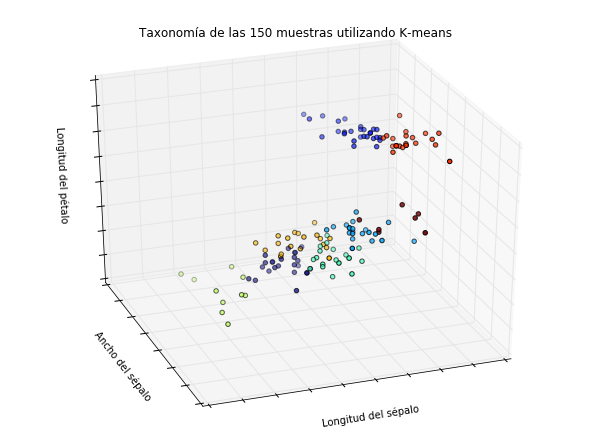

In [10]:
%matplotlib inline

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import cluster, datasets

iris = datasets.load_iris()
X_iris = iris.data

# Cargamos el algoritmo K-means y hacemos fit a nuestros datos:
k_means = cluster.KMeans()
k_means.fit(X_iris)

fig = plt.figure(1, figsize=(8, 6))
ax = Axes3D(fig, elev=-150, azim=110)
ax.scatter(X_iris[:,[0]], X_iris[:,[1]], X_iris[:,[2]], c=k_means.labels_)
ax.set_title(u"Taxonomía de las 150 muestras utilizando K-means")
ax.set_xlabel(u"Longitud del sépalo")
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel(u"Ancho del sépalo")
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel(u"Longitud del pétalo")
ax.w_zaxis.set_ticklabels([])

¡Notad que en **ningún momento se utiliza la clase de la muestra** (`iris.target`) para entrenar el algoritmo ni para evaluarlo! Ahora estamos utilizando un algoritmo de clústering, que agrupará las muestras en función de las características de las mismas. El resultado del algoritmo es el grupo al que pertenece cada muestra (pero el algoritmo no intenta predecir la clase de la muestra). Los nombres de los grupos generados son arbitrarios (en este caso, valores enteros del 0 al número de grupos - 1). 

Vamos ahora a forzar que el número de clústers sea igual a 3 y vamos a representar el resultado:

[]

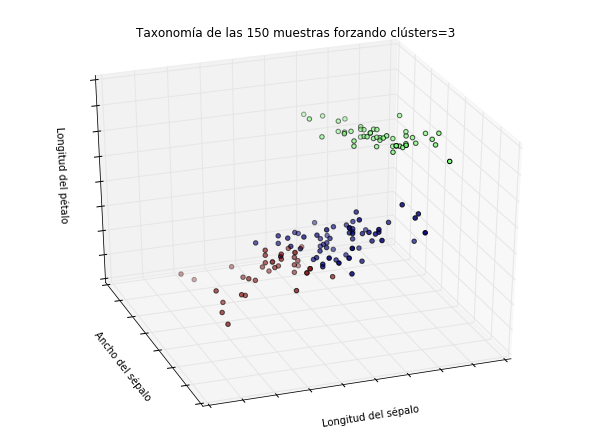

In [11]:
%matplotlib inline

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import cluster, datasets

iris = datasets.load_iris()
X_iris = iris.data

# Cargamos el algoritmo K-means y hacemos fit a nuestros datos
# esta vez forzando el número de clústers a tres:
k_means = cluster.KMeans(n_clusters=3)
k_means.fit(X_iris)

fig = plt.figure(1, figsize=(8, 6))
ax = Axes3D(fig, elev=-150, azim=110)
ax.scatter(X_iris[:,[0]], X_iris[:,[1]], X_iris[:,[2]], c=k_means.labels_)
ax.set_title(u"Taxonomía de las 150 muestras forzando clústers=3")
ax.set_xlabel(u"Longitud del sépalo")
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel(u"Ancho del sépalo")
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel(u"Longitud del pétalo")
ax.w_zaxis.set_ticklabels([])

Recordad que utilizando un algoritmo de clústering no aprendemos a qué clase pertenece cada muestra sino que simplemente agrupamos las muestras en grupos (clústers).

## Validación del modelo

Debemos evitar evaluar los modelos con los mismos datos que se han utilizado para el aprendizaje. En el ejemplo de clasificación, hemos separado los datos de manera aleatoria en dos conjuntos, uno para el aprendizaje y uno para el test. Está técnica se conoce como *holdout*. En el ejemplo de la clasificación hemos usado numpy para crear los dos conjuntos. En la unidad 6 vimos cómo realizar este mismo proceso usando las funciones sobre *dataframes* que ofrece la libería pandas. Ahora veremos cómo podemos hacerlo usando sklearn:

In [12]:
# Importamos la función 'train_test_split'.
from sklearn.model_selection import train_test_split

# Separamos las muestras utilizando un 20 % para test y el resto para aprendizaje.
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.2, random_state=0)

print "Total de muestras: " + str(len(iris.data))
print "Aprendizaje: " + str(len(X_train)), "(" + str(float(len(X_train))/len(iris.data)*100) + "%)"
print "Test: " + str(len(X_test)), "(" + str(float(len(X_test))/len(iris.data)*100) + "%)"

Total de muestras: 150
Aprendizaje: 120 (80.0%)
Test: 30 (20.0%)


También podemos usar otras técnicas para evaluar los modelos, por ejemplo, _kfold_ o _Leave One Out_:

In [13]:
# Importamos la función KFold.
from sklearn.model_selection import KFold
# Importamos NumPy.
import numpy as np

# Particionamos un conjunto de nueve muestras usando 3-Fold y mostramos el resultado.
X = np.array(range(9))
kf = KFold(n_splits=3)
for train, test in kf.split(X):
    print("%s %s" % (X[train], X[test]))

[3 4 5 6 7 8] [0 1 2]
[0 1 2 6 7 8] [3 4 5]
[0 1 2 3 4 5] [6 7 8]


In [14]:
# Importamos la función LeaveOneOut.
from sklearn.model_selection import LeaveOneOut
# Importamos NumPy.
import numpy as np

# Particionamos un conjunto de nueve muestras usando LeaveOneOut y mostramos el resultado.
X = np.array(range(9))
loo = LeaveOneOut()
for train, test in loo.split(X):
    print("%s %s" % (X[train], X[test]))

[1 2 3 4 5 6 7 8] [0]
[0 2 3 4 5 6 7 8] [1]
[0 1 3 4 5 6 7 8] [2]
[0 1 2 4 5 6 7 8] [3]
[0 1 2 3 5 6 7 8] [4]
[0 1 2 3 4 6 7 8] [5]
[0 1 2 3 4 5 7 8] [6]
[0 1 2 3 4 5 6 8] [7]
[0 1 2 3 4 5 6 7] [8]
